# Линейная регрессия

Иногда полезно представлять параметры нормального распеределения в виде функций

$$\large{p(y|x; \theta) = N (y|f_\mu(x; \theta), f_\sigma(x; \theta)^2)}$$ 

Часто считают диспресию фиксированной и независимой от входных данных, это называется гомоскедастичная регрессия

Давайте предположим что наше среднее это линейная функция от входного параметра:

$$\large{p(y|x; \theta) = N (y|f_\mu(wx + b; \theta), \sigma^2)}$$ 

Это означает что данные распеределены около линейной функции от входного параметра

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

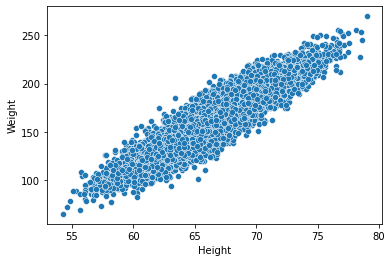

In [5]:
sns.scatterplot(x="Height", y="Weight", data=df);

Рассмотрим PDF

$$\large{p(y|x; \theta) = N(y|f_\mu(wx + b; \theta), \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y - wx + b)^2}{\sigma^2}}}$$

Нам интересно найти параметры распределения w и b таким образом чтобы вероятность $p(y|x; \theta)$ была максимальна, вспомним что:

1. $\sigma$ - константа
1. Экспонента монотонно возрастающая функция

Тогда:

$$max(p(y|x; \theta)) \sim max(-\frac{(y - wx + b)^2}{\sigma^2}) = min(\frac{(y - wx + b)^2}{\sigma^2}) = min((y - wx + b)^2)$$

Обозначим наши предсказания $\large{\hat{y} = wx + b}$

Тогда мы ищем минимум функции

$$\large{L = \sum_{i=1}^{N}(y_i - \hat{y}_i)^2}$$

В машинном обучении:

- L - обозначается функция потерь
- $\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$ - называется среднеквадратичной ошибкой или MSE (mean squared error) 

Наша цель минимизировать L по параметрам w и b, производная минимума функции равна 0

$$\frac{d(\sum_{i=1}^{N}(y_i - \hat{y}_i)^2)}{dw} = \frac{d(\sum_{i=1}^{N}(wx_i + b - y_i)^2)}{dw}$$

$$\frac{d(\sum_{i=1}^{N}(wx_i + b - y_i)^2)}{dw} = \frac{d(\sum_{i=1}^{N}((wx_i + b)^2 - 2y_i(wx_i + b) + y_i^2)}{dw}$$
$$\frac{d(\sum_{i=1}^{N}((wx_i + b)^2 - 2y_i(wx_i + b) + y_i^2)}{db} = \sum_{i=1}^{N}(2(wx_i + b) - 2y_i)$$
$$\sum_{i=1}^{N}(2(wx_i + b) - 2y_i) = 0$$
$$\sum_{i=1}^{N}b = \sum_{i=1}^{N}(y_i - wx_i)$$
$$b = \frac{\sum_{i=1}^{N}(y_i - wx_i)}{N}$$
$$b = \frac{1}{N}\sum_{i=1}^{N}y_i - w\frac{1}{N}\sum_{i=1}^{N}x_i$$
$$b = y_{mean} - wx_{mean}$$
$$\frac{d(\sum_{i=1}^{N}((wx_i + b)^2 - 2y_i(wx_i + b) + y_i^2)}{dw} = \sum_{i=1}^{N}(2x_i(wx_i + b) - 2y_ix_i)$$
$$\sum_{i=1}^{N}(2x_i(wx_i + b) - 2y_ix_i) = 0$$
$$\sum_{i=1}^{N}(x_i(wx_i + b) - y_ix_i) = 0$$
$$\sum_{i=1}^{N}(x_i(wx_i + b)) = \sum_{i=1}^{N}(y_ix_i)$$
$$\sum_{i=1}^{N}(x_i(wx_i + y_{mean} - wx_{mean})) = \sum_{i=1}^{N}(y_ix_i)$$
$$\sum_{i=1}^{N}wx_i^2 + \sum_{i=1}^{N}y_{mean}x_i - \sum_{i=1}^{N}wx_ix_{mean} = \sum_{i=1}^{N}y_ix_i$$
$$w(\sum_{i=1}^{N}x_i^2 - \sum_{i=1}^{N}x_ix_{mean}) = \sum_{i=1}^{N}y_ix_i - \sum_{i=1}^{N}y_{mean}x_i$$ 
$$w = \frac{\sum_{i=1}^{N}y_ix_i - y_{mean}\sum_{i=1}^{N}x_i}{\sum_{i=1}^{N}x_i^2 - x_{mean}\sum_{i=1}^{N}x_i}$$ 

ИТОГ:

$$\large{w = \frac{\sum_{i=1}^{N}y_ix_i - y_{mean}\sum_{i=1}^{N}x_i}{\sum_{i=1}^{N}x_i^2 - x_{mean}\sum_{i=1}^{N}x_i}}$$ 
$$\large{b = y_{mean} - wx_{mean}}$$

In [6]:
def calc_parameters(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    w = (
        ((x*y).sum() - y_mean*x.sum()) / 
        ((x ** 2).sum() - x_mean * x.sum())
    )
    b = y_mean - w * x_mean
    return w, b

In [7]:
w, b = calc_parameters(df["Height"], df["Weight"])

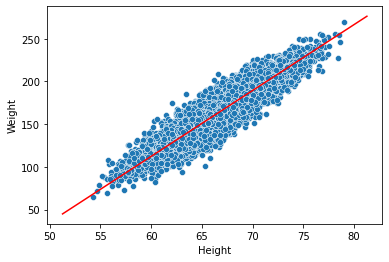

In [8]:
sns.scatterplot(x="Height", y="Weight", data=df);
x = np.arange(df["Height"].min() - 3, df["Height"].max() + 3)
plt.plot(x, x * w + b, c="r");

In [9]:
prediction = df["Height"] * w + b
mse = ((df["Weight"] - prediction) ** 2).mean()
print(f"MSE: {mse:.3f}")

MSE: 149.293


In [10]:
male_df = df.loc[df["Gender"] == "Male", :]
female_df = df.loc[df["Gender"] == "Female", :]

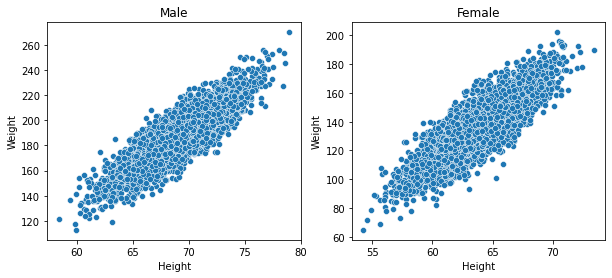

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)
sns.scatterplot(x="Height", y="Weight", data=male_df, ax=ax[0]);
ax[0].set_title("Male");
sns.scatterplot(x="Height", y="Weight", data=female_df, ax=ax[1]);
ax[1].set_title("Female");

In [12]:
w, b = calc_parameters(male_df["Height"], male_df["Weight"])
male_prediction = male_df["Height"] * w + b

w, b = calc_parameters(female_df["Height"], female_df["Weight"])
female_prediction = female_df["Height"] * w + b

In [13]:
total_prediction = male_prediction.append(female_prediction)
total_weight = male_df["Weight"].append(female_df["Weight"])

In [14]:
mse = ((total_weight - total_prediction) ** 2).mean()
print(f"MSE: {mse:.3f}")

MSE: 100.250
